*   Multimídia - Imagem II (Exercício 1)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função que realiza o cálculo do histograma de um conjunto de dados armazenados em uma matriz "M", dado o nível de quantização "quant"
#Para uma imagem em níveis de cinza de 8 bits, "quant" é igual a 256
def getHistogram(M, quant):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape

  #Transformação dos elementos da matriz em inteiro
  M = M.astype('uint8')

  #Vetor que será armazenado o histograma, com o tamanho igual a quantidade de níveis disponíveis de acordo com a quantização
  #Nesse caso, a quatização é de 8 bits, ou seja, 2^8 = 256 níveis distintos
  histogram = np.zeros(quant)
    
  #Laço que analisa cada pixel do vetor e realiza a contagem de cada valor e determina a quantidade de cada nível na imagem
  for i in range(n_rows):

    for j in range(n_columns):

      histogram[M[i, j]] += 1
  
  return histogram

In [ ]:
#Função que realiza a segmentação de uma imagem armazanada em uma matriz "M" de acordo com um limiar "T", retornando uma imagem binária
def segment(M, T):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape
    
  #Declaração da imagem binária de saída  
  bin = np.empty(M.shape)

  #Laço que percorre a imagem e analisa quais pixels são maiores e quais são menores que o limiar definido, atriuindo 1 e 0 aos elementos
  for i in range(n_rows):

    for j in range(n_columns):

      if M[i, j] > T:

        bin[i, j] = 255
        
      else:

        bin[i, j] = 0
  
  return bin

In [ ]:
#Função que realiza a partição de uma imagem armazanada em uma matriz "M" de acordo com a quantidade de divisões das linhas ("p_rows") e das colunas ("p_columns")
#Logo, a imagem será dividida em "p_rows * p_columns" partes
def part(M, p_rows, p_columns):

  #Obtenção das dimensões da imagem
  n_rows, n_columns = M.shape

  #Janela escolhida para a partição da imagem
  i_window = round(n_rows / p_rows) + 1
  j_window = round(n_columns / p_columns) + 1

  #Lista que armazenará as sub-imagens
  img_list = []

  #Obtenção das partes da imagem para posterior análise
  for i in range(0, n_rows, i_window):

    for j in range (0, n_columns, j_window):

      img_list.append(M[i : i + i_window, j : j + j_window])
  
  return img_list

Definidas as funções acima, será selecionado um grupo 3 imagens em nível de cinza para segmentação, utilizando a estratégia de limiar global e limiar local. Para a estratégia de limiarização global, será obtido o histograma de cada imagem para análise e definição manual do limiar. Para a limiarização local, cada imagem será dividida em 4 partes e, para cada parte, o processo será o mesmo, ou seja, obtenção dos 4 histogramas e análise para a definição dos 4 limiares adotados.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


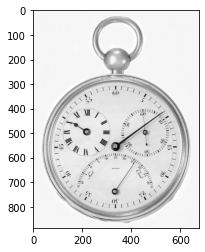

In [ ]:
#Imagem 01

#Declaração das bibliotecas necessárias, definição do diretório raíz e montagem do diretório
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/threshold/'

#Carregamento da imagem
im_1 = Image.open(root_path + 'relogio300.tif')

#Conversão da imagem em matriz
pixel_1 = asarray(im_1)

#Mostrar imagem original
plt.imshow(im_1, 'gray', origin = 'upper')
plt.show()

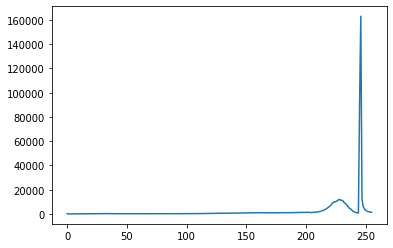

In [ ]:
#Imagem 01

#Plotando histograma para análise
hist = getHistogram(pixel_1, 256)

plt.plot(hist)

Observando o histograma da imagem 01, será adotado o limiar de 240

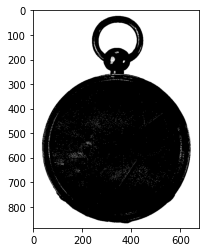

In [ ]:
#Imagem 01

#Segmentação da imagem com o limiar de 240
im_seg_1 = segment(pixel_1, 240)

#Conversão da matriz em imagem
im_seg_1 = Image.fromarray(im_seg_1)

#Mostrar a imagem segmentada
plt.imshow(im_seg_1, 'gray', origin = 'upper')
plt.show()

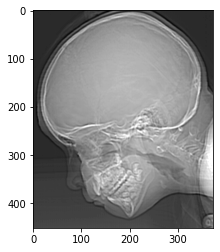

In [ ]:
#Imagem 02

#Carregamento da imagem
im_2 = Image.open(root_path + 'imagem_teste.tif')

#Conversão da imagem em matriz
pixel_2 = asarray(im_2)

#Mostrar imagem original
plt.imshow(im_2, 'gray', origin = 'upper')
plt.show()

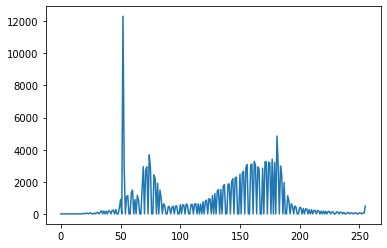

In [ ]:
#Imagem 02 

#Plotando histograma para análise
hist = getHistogram(pixel_2, 256)

plt.plot(hist)

Observando o histograma da imagem 02, será adotado o limiar de 100

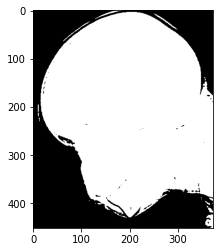

In [ ]:
#Imagem 02

#Segmentação da imagem com o limiar de 100
im_seg_2 = segment(pixel_2, 100)

#Conversão da matriz em imagem
im_seg_2 = Image.fromarray(im_seg_2)

#Mostrar a imagem segmentada
plt.imshow(im_seg_2, 'gray', origin = 'upper')
plt.show()

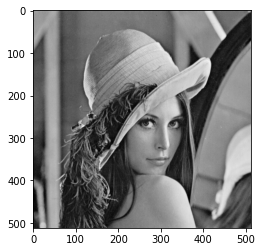

In [ ]:
#Imagem 03

#Carregamento da imagem
im_3 = Image.open(root_path + 'lena.tiff')

#Conversão da imagem em matriz
pixel_3 = asarray(im_3)

#Mostrar imagem original
plt.imshow(im_3, 'gray', origin = 'upper')
plt.show()

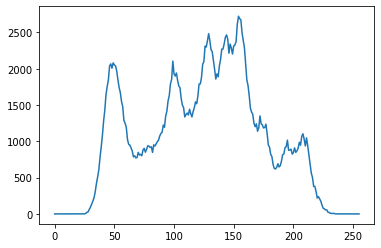

In [ ]:
#Imagem 03

#Plotando histograma para análise
hist = getHistogram(pixel_3, 256)

plt.plot(hist)

Observando o histograma da imagem 03, será adotado o limiar de 115

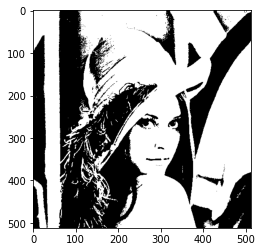

In [ ]:
#Imagem 03

#Segmentação da imagem com o limiar de 115
im_seg_3 = segment(pixel_3, 115)

#Conversão da matriz em imagem
im_seg_3 = Image.fromarray(im_seg_3)

#Mostrar a imagem segmentada
plt.imshow(im_seg_3, 'gray', origin = 'upper')
plt.show()

É possível notar que, o emprego do limiar manual para as imagens gerou um resultado insatisfatório. Para tentar melhorar o resultado, será utilizada, a seguir, a técnica da limiarização local.

Para realizar a limiarização local, será estabelecida uma janela de tamanho 4, ou seja, a imagem original será dividida em 4 partes. Cada uma das partes terá seu próprio histograma e será analisada de forma independente. Após o processo de limiarização, as partes serão reunidas novamente para a obtenção do resultado final.

In [ ]:
#Imagem 01

#Partição da imagem com a função "part"
#Será definida uma divisão de 2 partes das linhas e colunas e, portanto, uma divisão da imagem original em 4 partes
#Logo, será obtido uma lista de matrizes, onde cada posição irá armazenar uma sub-imagem da imagem original
img_list = part(pixel_1, 2, 2)

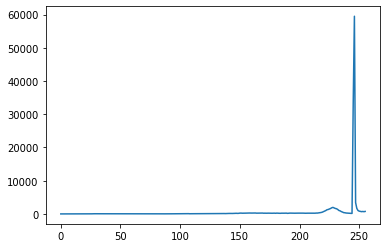

In [ ]:
#Imagem 01

#Obtenção do primeiro histograma da imagem 
hist_1 = getHistogram(img_list[0], 256)

plt.plot(hist_1)

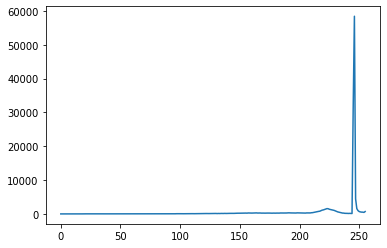

In [ ]:
#Imagem 01

#Obtenção do segundo histograma da imagem 
hist_2 = getHistogram(img_list[1], 256)

plt.plot(hist_2)

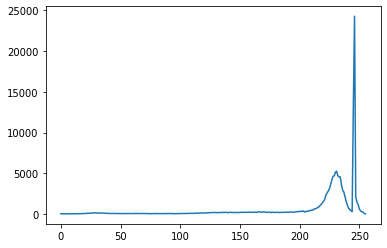

In [ ]:
#Imagem 01

#Obtenção do terceiro histograma da imagem 
hist_3 = getHistogram(img_list[2], 256)

plt.plot(hist_3)

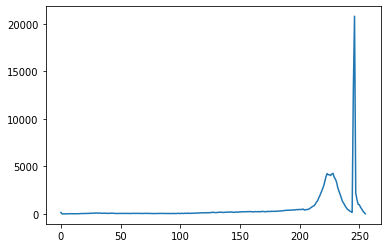

In [ ]:
#Imagem 01

#Obtenção do quarto histograma da imagem 
hist_4 = getHistogram(img_list[3], 256)

plt.plot(hist_4)

Observando os histogramas acima, serão definido os 4 limiares em, respectivamente, 240, 240, 238, 241

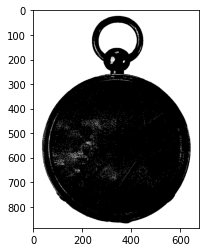

In [ ]:
#Imagem 01

#Obtenção das dimensões da imagem
n_rows, n_columns = pixel_1.shape

im_seg_1 = np.empty(pixel_1.shape)

#Obtenção das sub-imagens segmentadas
part_1 = segment(img_list[0], 240)
part_2 = segment(img_list[1], 240)
part_3 = segment(img_list[2], 238)
part_4 = segment(img_list[3], 241)

#Junção das sub-imagens
im_seg_1[0 : round(n_rows / 2) + 1, 0 : round(n_columns / 2) + 1] = part_1
im_seg_1[0 : round(n_rows / 2) + 1, round(n_columns / 2) + 1 : n_columns] = part_2
im_seg_1[round(n_rows / 2) + 1 : n_rows, 0 : round(n_columns / 2) + 1] = part_3
im_seg_1[round(n_rows / 2) + 1 : n_rows, round(n_columns / 2) + 1 : n_columns] = part_4

#Conversão da matriz resultante para imagem
img_seg_1 = Image.fromarray(im_seg_1)

#Mostrar a imagem segmentada
plt.imshow(img_seg_1, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 02

#Partição da imagem com a função "part"
#Será definida uma divisão de 2 partes das linhas e colunas e, portanto, uma divisão da imagem original em 4 partes
#Logo, será obtido uma lista de matrizes, onde cada posição irá armazenar uma sub-imagem da imagem original
img_list = part(pixel_2, 2, 2)

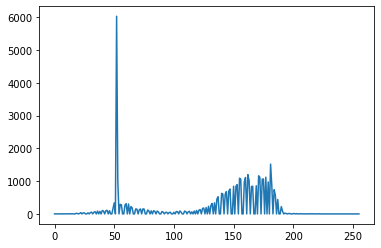

In [ ]:
#Imagem 02

#Obtenção do primeiro histograma da imagem 
hist_1 = getHistogram(img_list[0], 256)

plt.plot(hist_1)

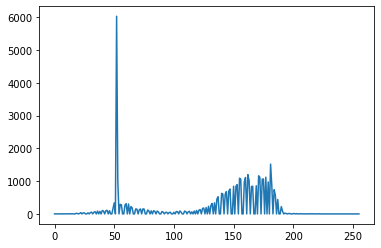

In [ ]:
#Imagem 02

#Obtenção do segundo histograma da imagem 
hist_2 = getHistogram(img_list[1], 256)

plt.plot(hist_1)

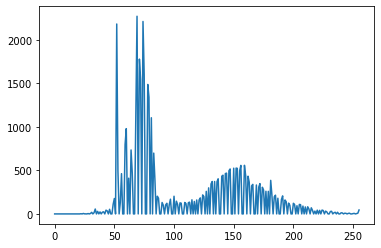

In [ ]:
#Imagem 02

#Obtenção do terceiro histograma da imagem 
hist_3 = getHistogram(img_list[2], 256)

plt.plot(hist_3)

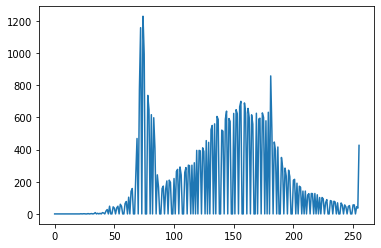

In [ ]:
#Imagem 02

#Obtenção do quarto histograma da imagem 
hist_4 = getHistogram(img_list[3], 256)

plt.plot(hist_4)

Observando os histogramas acima, serão definido os 4 limiares em, respectivamente, 90, 90, 100, 110

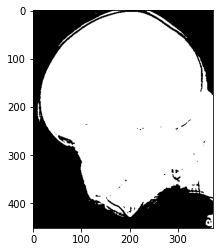

In [ ]:
#Imagem 02

#Obtenção das dimensões da imagem
n_rows, n_columns = pixel_2.shape

im_seg_2 = np.empty(pixel_2.shape)

#Obtenção das sub-imagens segmentadas
part_1 = segment(img_list[0], 90)
part_2 = segment(img_list[1], 90)
part_3 = segment(img_list[2], 100)
part_4 = segment(img_list[3], 110)

#Junção das sub-imagens
im_seg_2[0 : round(n_rows / 2) + 1, 0 : round(n_columns / 2) + 1] = part_1
im_seg_2[0 : round(n_rows / 2) + 1, round(n_columns / 2) + 1 : n_columns] = part_2
im_seg_2[round(n_rows / 2) + 1 : n_rows, 0 : round(n_columns / 2) + 1] = part_3
im_seg_2[round(n_rows / 2) + 1 : n_rows, round(n_columns / 2) + 1 : n_columns] = part_4

#Conversão da matriz resultante para imagem
img_seg_2 = Image.fromarray(im_seg_2)

#Mostrar a imagem segmentada
plt.imshow(img_seg_2, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 03

#Partição da imagem com a função "part"
#Será definida uma divisão de 2 partes das linhas e colunas e, portanto, uma divisão da imagem original em 4 partes
#Logo, será obtido uma lista de matrizes, onde cada posição irá armazenar uma sub-imagem da imagem original
img_list = part(pixel_3, 2, 2)

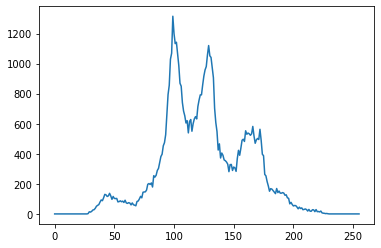

In [ ]:
#Imagem 03

#Obtenção do primeiro histograma da imagem 
hist_1 = getHistogram(img_list[0], 256)

plt.plot(hist_1)

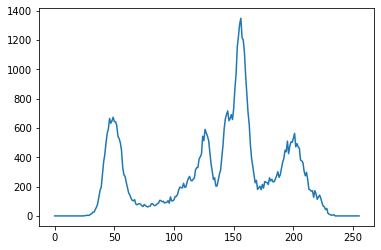

In [ ]:
#Imagem 03

#Obtenção do segundo histograma da imagem 
hist_2 = getHistogram(img_list[1], 256)

plt.plot(hist_2)

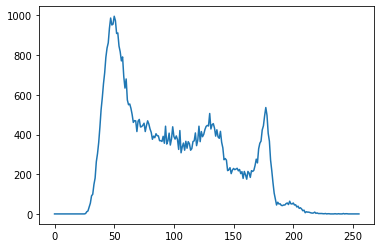

In [ ]:
#Imagem 03

#Obtenção do terceiro histograma da imagem 
hist_3 = getHistogram(img_list[2], 256)

plt.plot(hist_3)

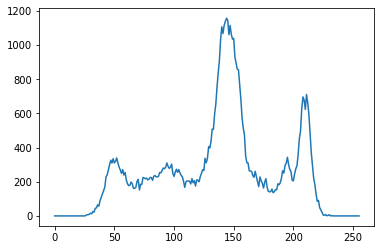

In [ ]:
#Imagem 03

#Obtenção do quarto histograma da imagem 
hist_4 = getHistogram(img_list[3], 256)

plt.plot(hist_4)

Observando os histogramas acima, serão definido os 4 limiares em, respectivamente, 115, 130, 120, 100

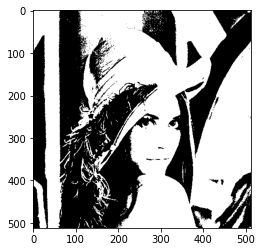

In [ ]:
#Imagem 03

#Obtenção das dimensões da imagem
n_rows, n_columns = pixel_3.shape

im_seg_3 = np.empty(pixel_3.shape)

#Obtenção das sub-imagens segmentadas
part_1 = segment(img_list[0], 115)
part_2 = segment(img_list[1], 130)
part_3 = segment(img_list[2], 120)
part_4 = segment(img_list[3], 100)

#Junção das sub-imagens
im_seg_3[0 : round(n_rows / 2) + 1, 0 : round(n_columns / 2) + 1] = part_1
im_seg_3[0 : round(n_rows / 2) + 1, round(n_columns / 2) + 1 : n_columns] = part_2
im_seg_3[round(n_rows / 2) + 1 : n_rows, 0 : round(n_columns / 2) + 1] = part_3
im_seg_3[round(n_rows / 2) + 1 : n_rows, round(n_columns / 2) + 1 : n_columns] = part_4

#Conversão da matriz resultante para imagem
img_seg_3 = Image.fromarray(im_seg_3)

#Mostrar a imagem segmentada
plt.imshow(img_seg_3, 'gray', origin = 'upper')

plt.show()

Observando os resultados, é notável que a segmentação de todas as imagens melhorou levemente, principalmente em relação as imagem 02. Apesar da pequena melhora, o resultado continua insatisfatório. Os resultados ruins se devem pelo pequeno tamanho da janela de partição das imagens e da técnica manual da obtenção do limiar, que não é muito eficiente. Pelo método de limiarização local, o número de janelas se limita a um valor pequeno, pois é necessário que o histograma de cada sub-imagem seja analisado. Portanto, torna-se impraticável dividir a imagem em muitas partes, dado que, por exemplo, 256 partes nos obriga a analisar 256 histogramas.